<a href="https://colab.research.google.com/github/refido/PCVK/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
from skimage import transform
from PIL import Image
import matplotlib.pyplot as plt

**TUGAS PRAKTIKUM**

1. **Buat Gamma Correction sesuai dengan petunjuk berikut**

Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai
Gamma akan diset dengan meminta masukan dari pengguna.

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


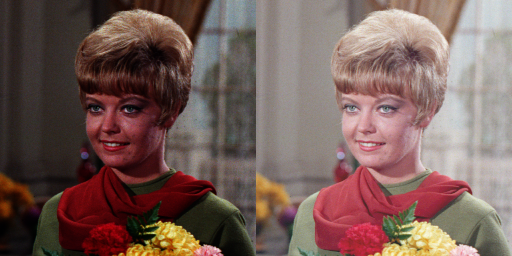

In [78]:
img = cv.imread('/content/drive/MyDrive/Images/female.tiff')
image = cv.cvtColor(img,cv.COLOR_BGR2RGB)

original = cv.cvtColor(image,cv.COLOR_BGR2RGB)
gamma_img = np.zeros(original.shape, original.dtype)

print(' Gamma Correction pada citra ')
print('----------------------------------')

try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

for height in range(original.shape[0]):
  for width in range(original.shape[1]):
    for channels in range(original.shape[2]):
      gamma_img[height,width,channels] = np.clip(255 * (original[height,width,channels]/255)**(1/gamma), 0, 255)

final_frame = cv.hconcat((original, gamma_img))
cv2_imshow(final_frame)

2. **Buat Simulasi Image Depth**

Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra,
pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada
pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga
255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000
0000) hingga 127 (111 1111). Jika 7bit, maka jumlah warnanya adalah 27 = 128, dst. Buat
simulasi dengan menggunakan nilai kedalaman 1 s/d 7 - bit

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai bit depth: 1


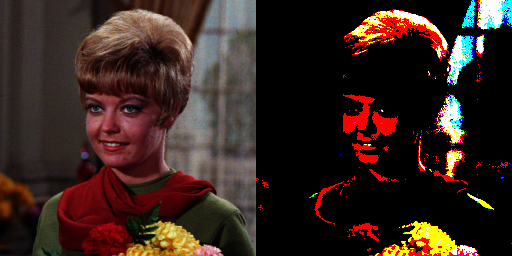

In [79]:
bit_depth_img = np.zeros(original.shape, original.dtype)

print(' Gamma Correction pada citra ')
print('----------------------------------')

try:
  bit_depth = float(input('Masukkan nilai bit depth: '))
except ValueError:
  print('Error, not a number')

bit=2**bit_depth
level = 255/(bit-1)

for height in range(original.shape[0]):
  for width in range(original.shape[1]):
    for channels in range(original.shape[2]):
      bit_depth_img[height,width,channels] = np.clip(round(original[height,width,channels]/level)*level, 0, 255)

final_frame = cv.hconcat((original, bit_depth_img))
cv2_imshow(final_frame)

3. **Buat modul Average Denoising**

Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab
sebelumnya.
Citra asli sudah disediakan pada /images/galaxy.jpg.
100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg
Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder ,
gunakan modul glob (import glob).

4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/teeth.jpg),
sedangkan image kanan adalah hasilnya:

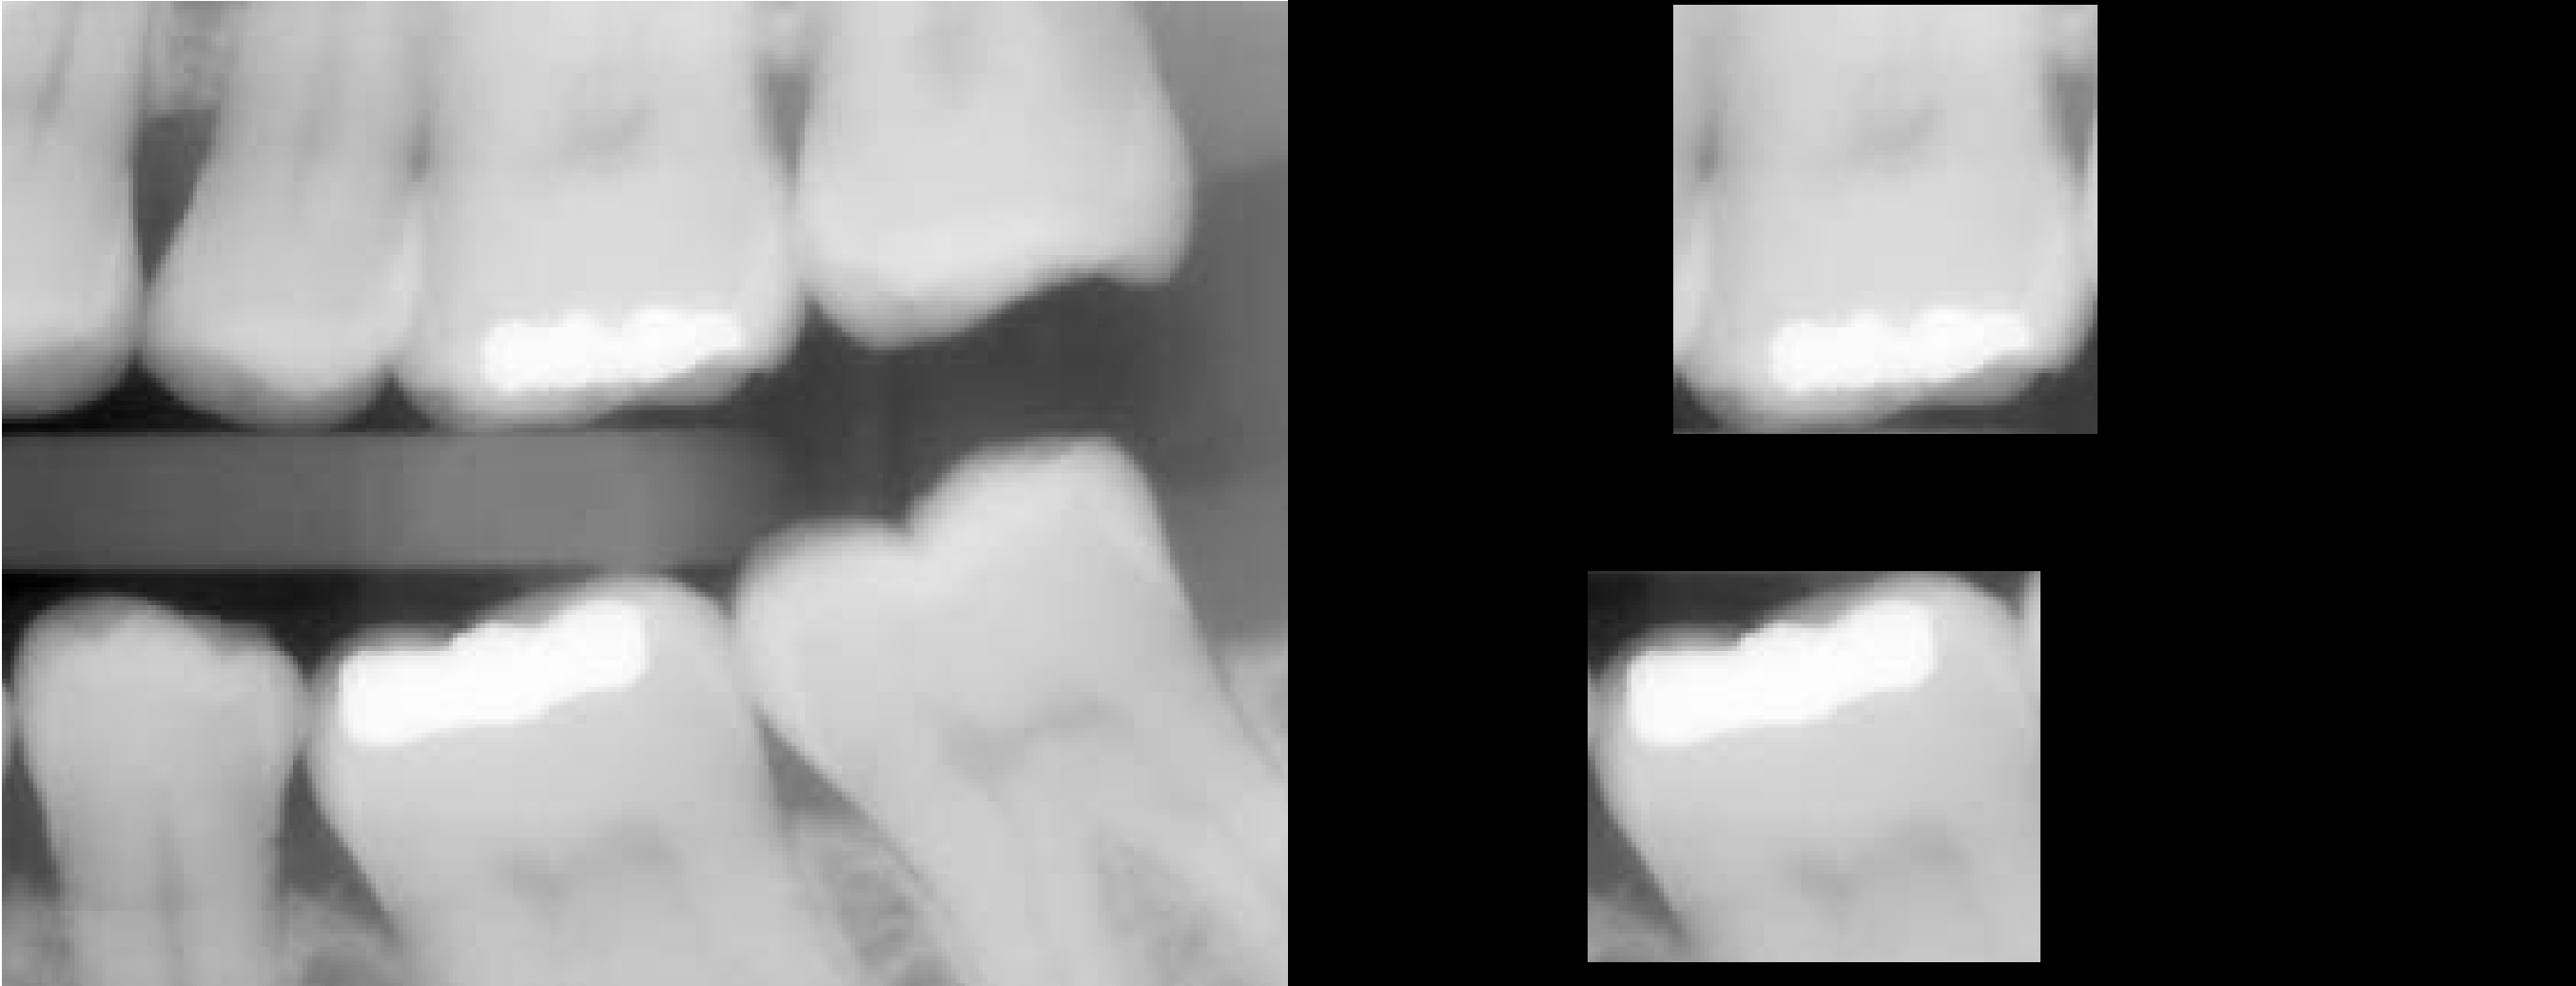

In [93]:
image = cv.imread('/content/drive/MyDrive/Images/teeth.jpg')

# creating a square of zeros using a variable
# rectangle = np.zeros((300, 300), dtype="uint8")
# cv.rectangle(rectangle, (25, 25), (275, 275), 255, -1)
# cv2_imshow(rectangle)

# creating a mask of that has the same dimensions of the image
# where each pixel is valued at 0
mask = np.zeros(image.shape[:2], dtype="uint8")

# creating a rectangle on the mask
# where the pixels are valued at 255
cv.rectangle(mask, (405, 5), (850, 455), 255, -1)
cv.rectangle(mask, (315, 600), (790, 1010), 255, -1)

# performing a bitwise_and with the image and the mask
masked = cv.bitwise_and(image, image, mask=mask)

final_frame = cv.hconcat((image, masked))
cv2_imshow(final_frame)

5. Lakukan percobaan menggunakan operator lain (OR, NOT, NAND, XOR) dan tunjukkan hasilnya

# OR

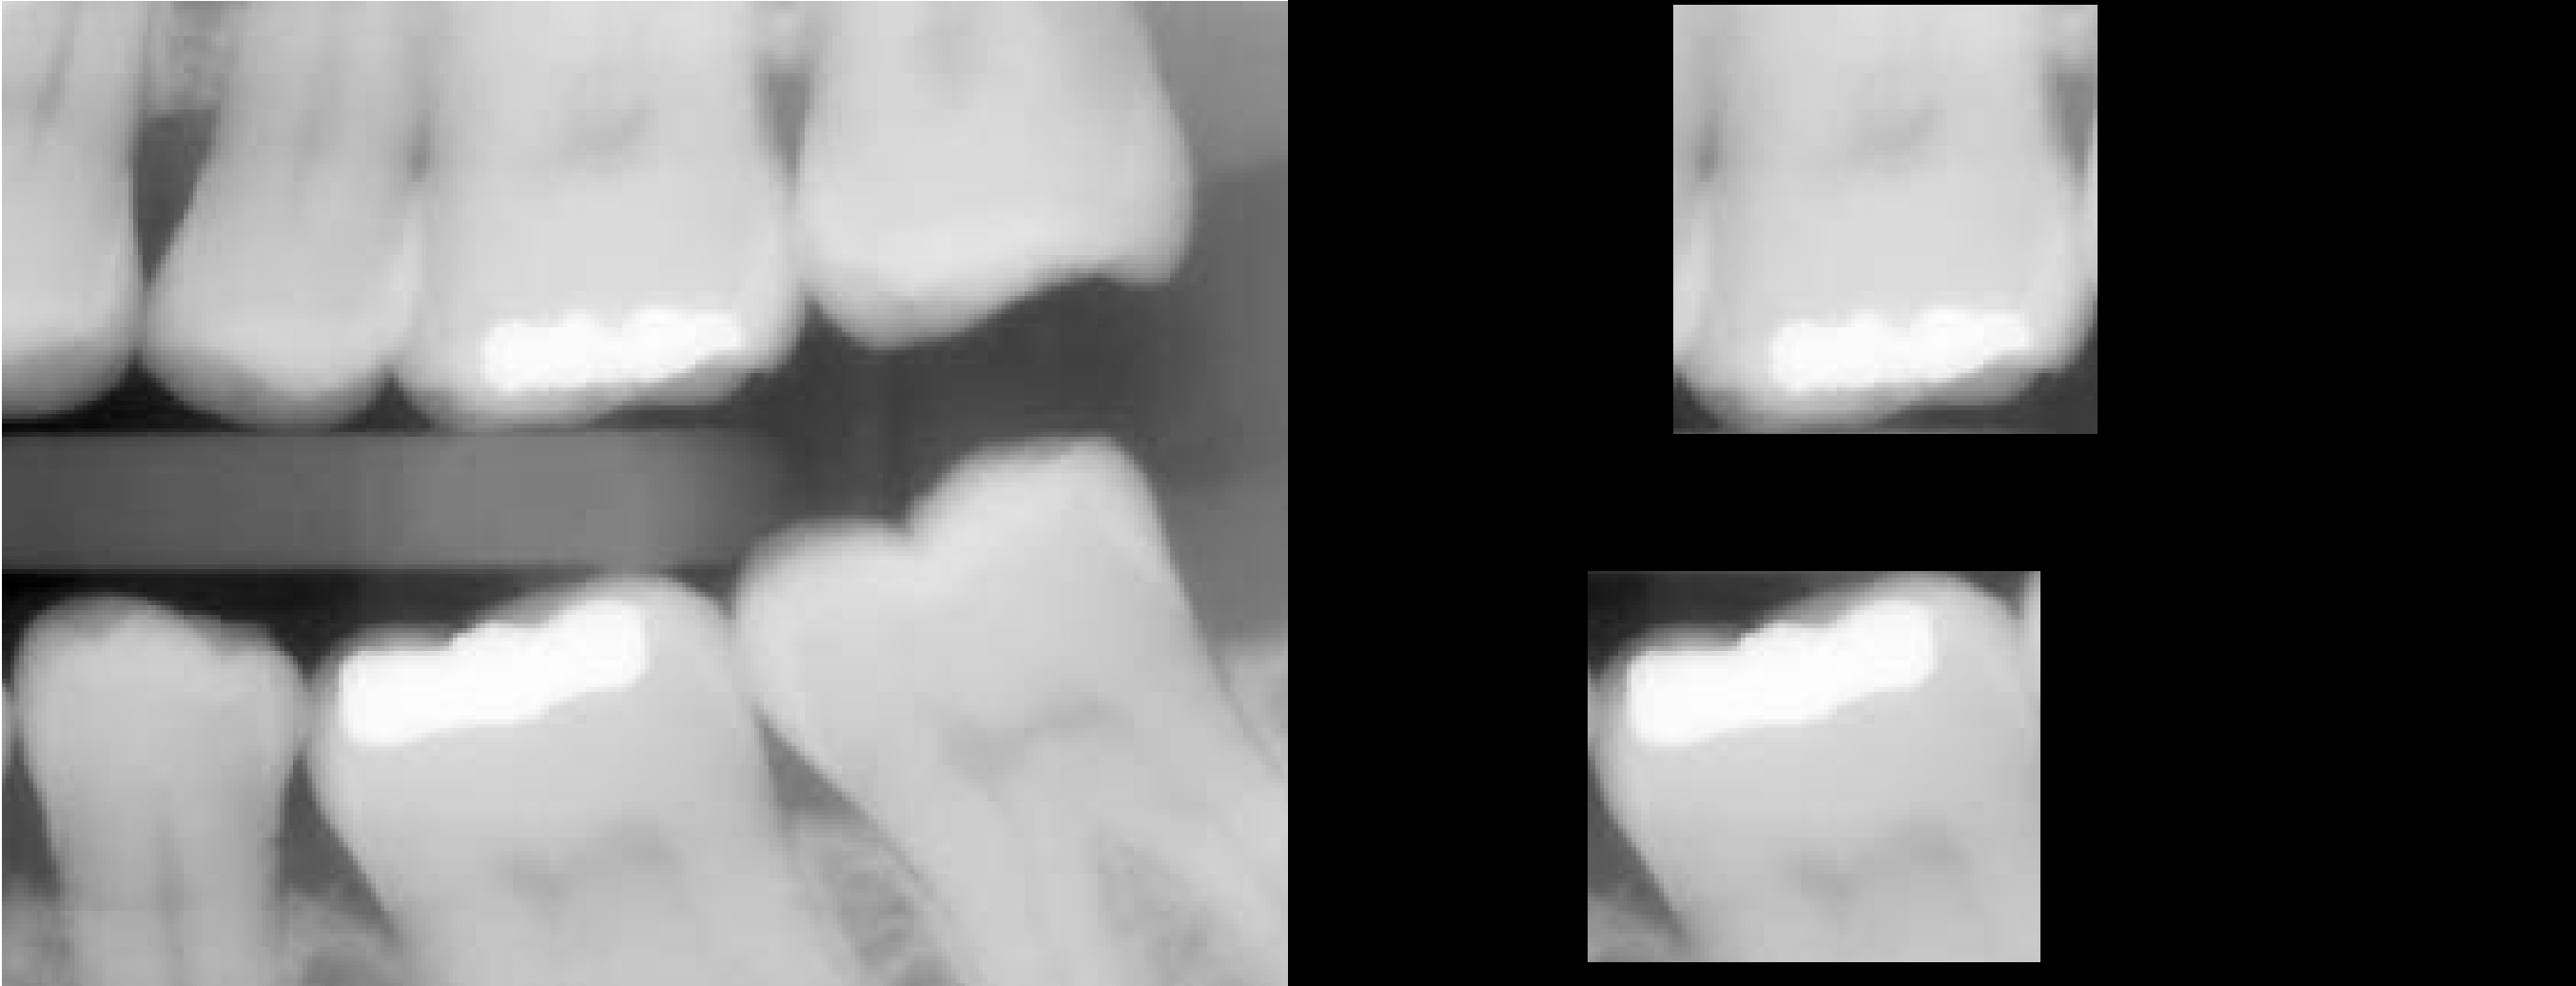

In [99]:
image1 = cv.imread('/content/drive/MyDrive/Images/teeth.jpg')

mask_or = np.zeros(image1.shape[:2], dtype="uint8")

cv.rectangle(mask_or, (405, 5), (850, 455), 255, -1)
cv.rectangle(mask_or, (315, 600), (790, 1010), 255, -1)

masked = cv.bitwise_or(image1, image1, mask=mask_or)

final_frame = cv.hconcat((image1, masked))
cv2_imshow(final_frame)

# NOT

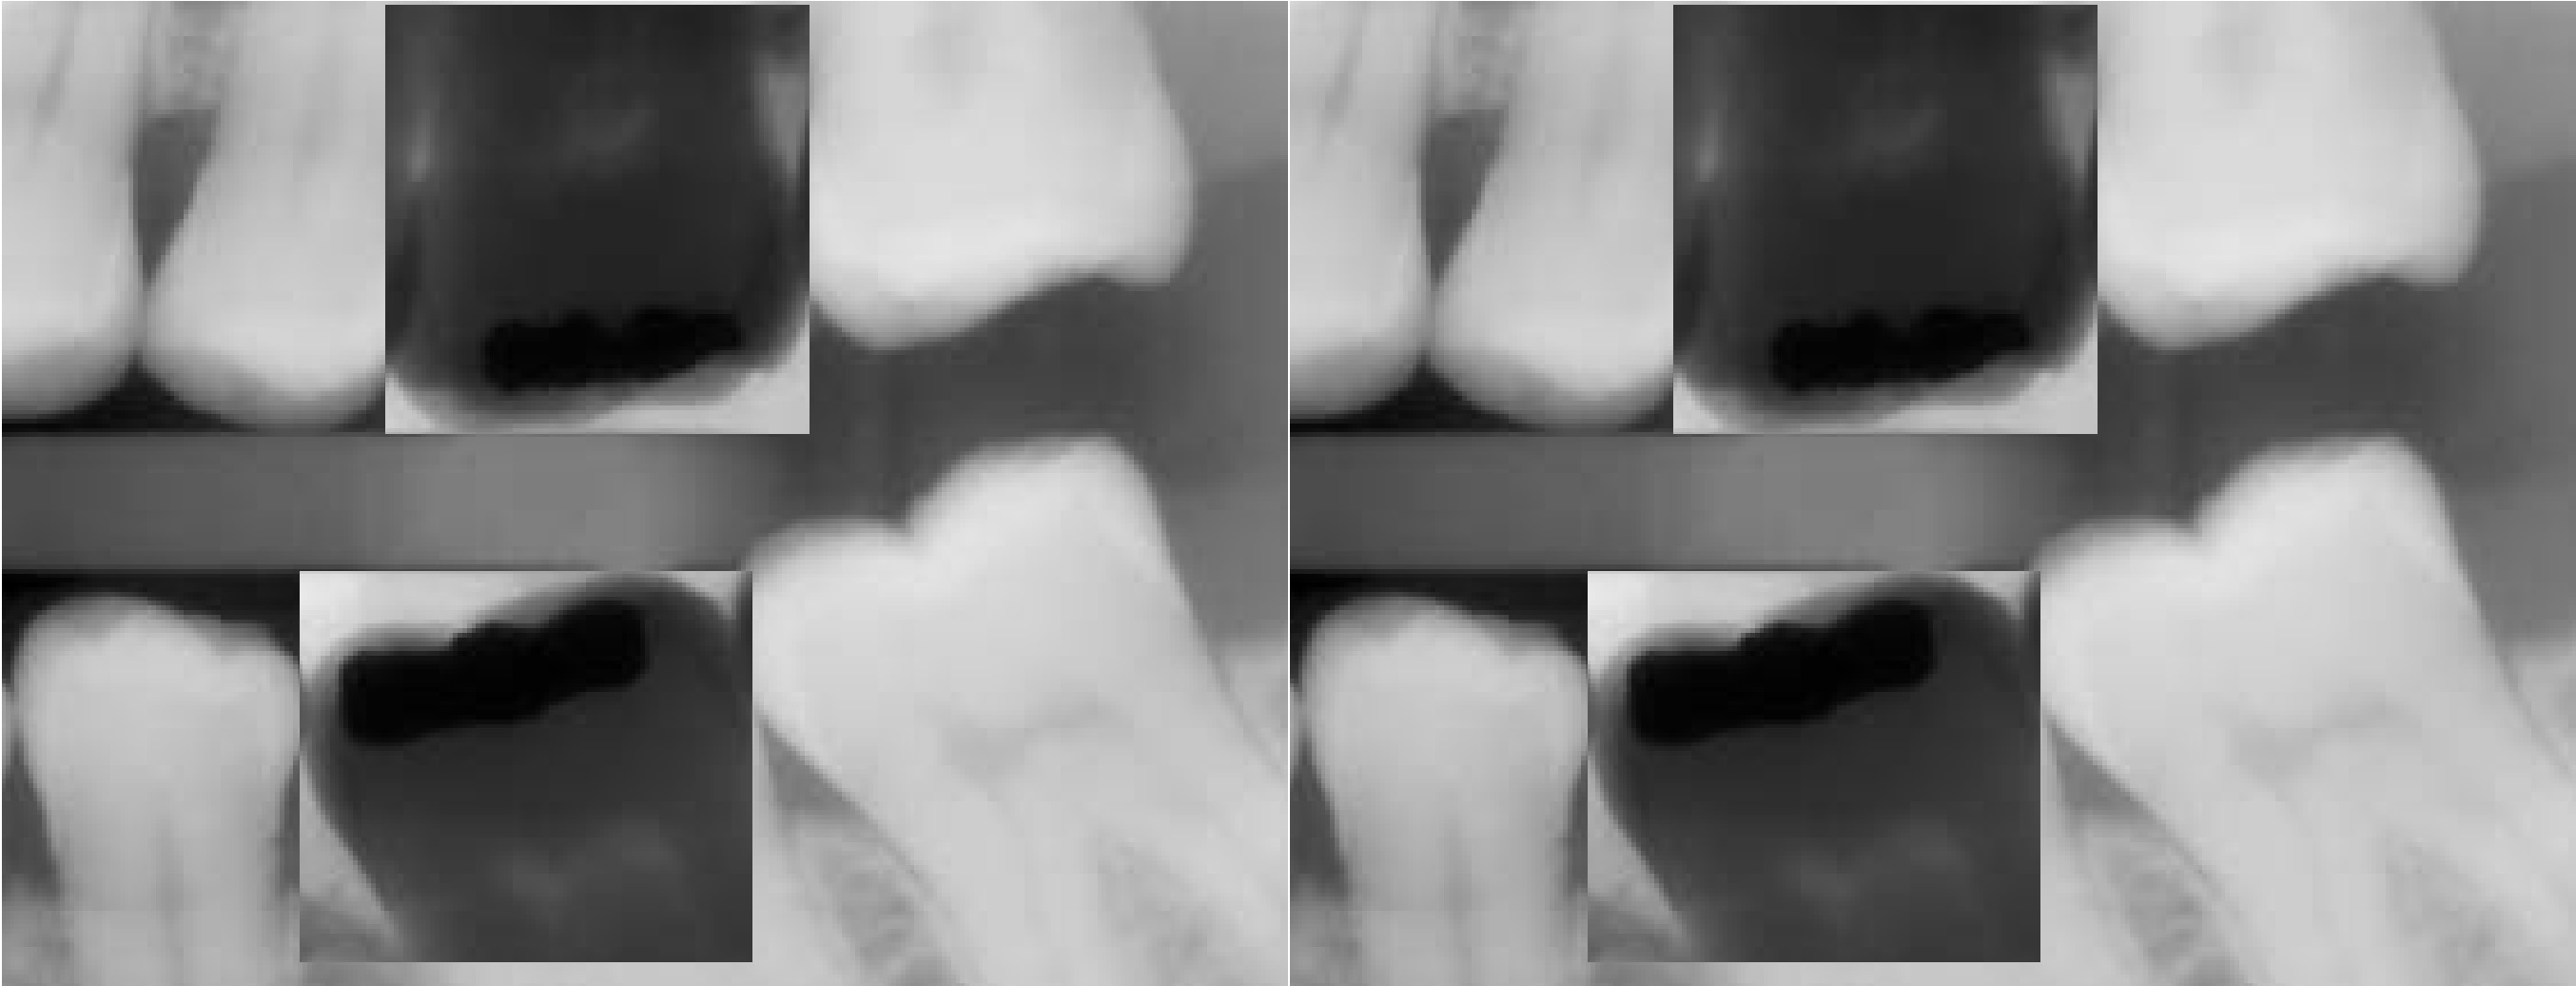

In [96]:
image2 = cv.imread('/content/drive/MyDrive/Images/teeth.jpg')

mask_not = np.zeros(image2.shape[:2], dtype="uint8")

cv.rectangle(mask_not, (405, 5), (850, 455), 255, -1)
cv.rectangle(mask_not, (315, 600), (790, 1010), 255, -1)

masked = cv.bitwise_not(image2, image2, mask=mask_not)

final_frame = cv.hconcat((image2, masked))
cv2_imshow(final_frame)

# NAND

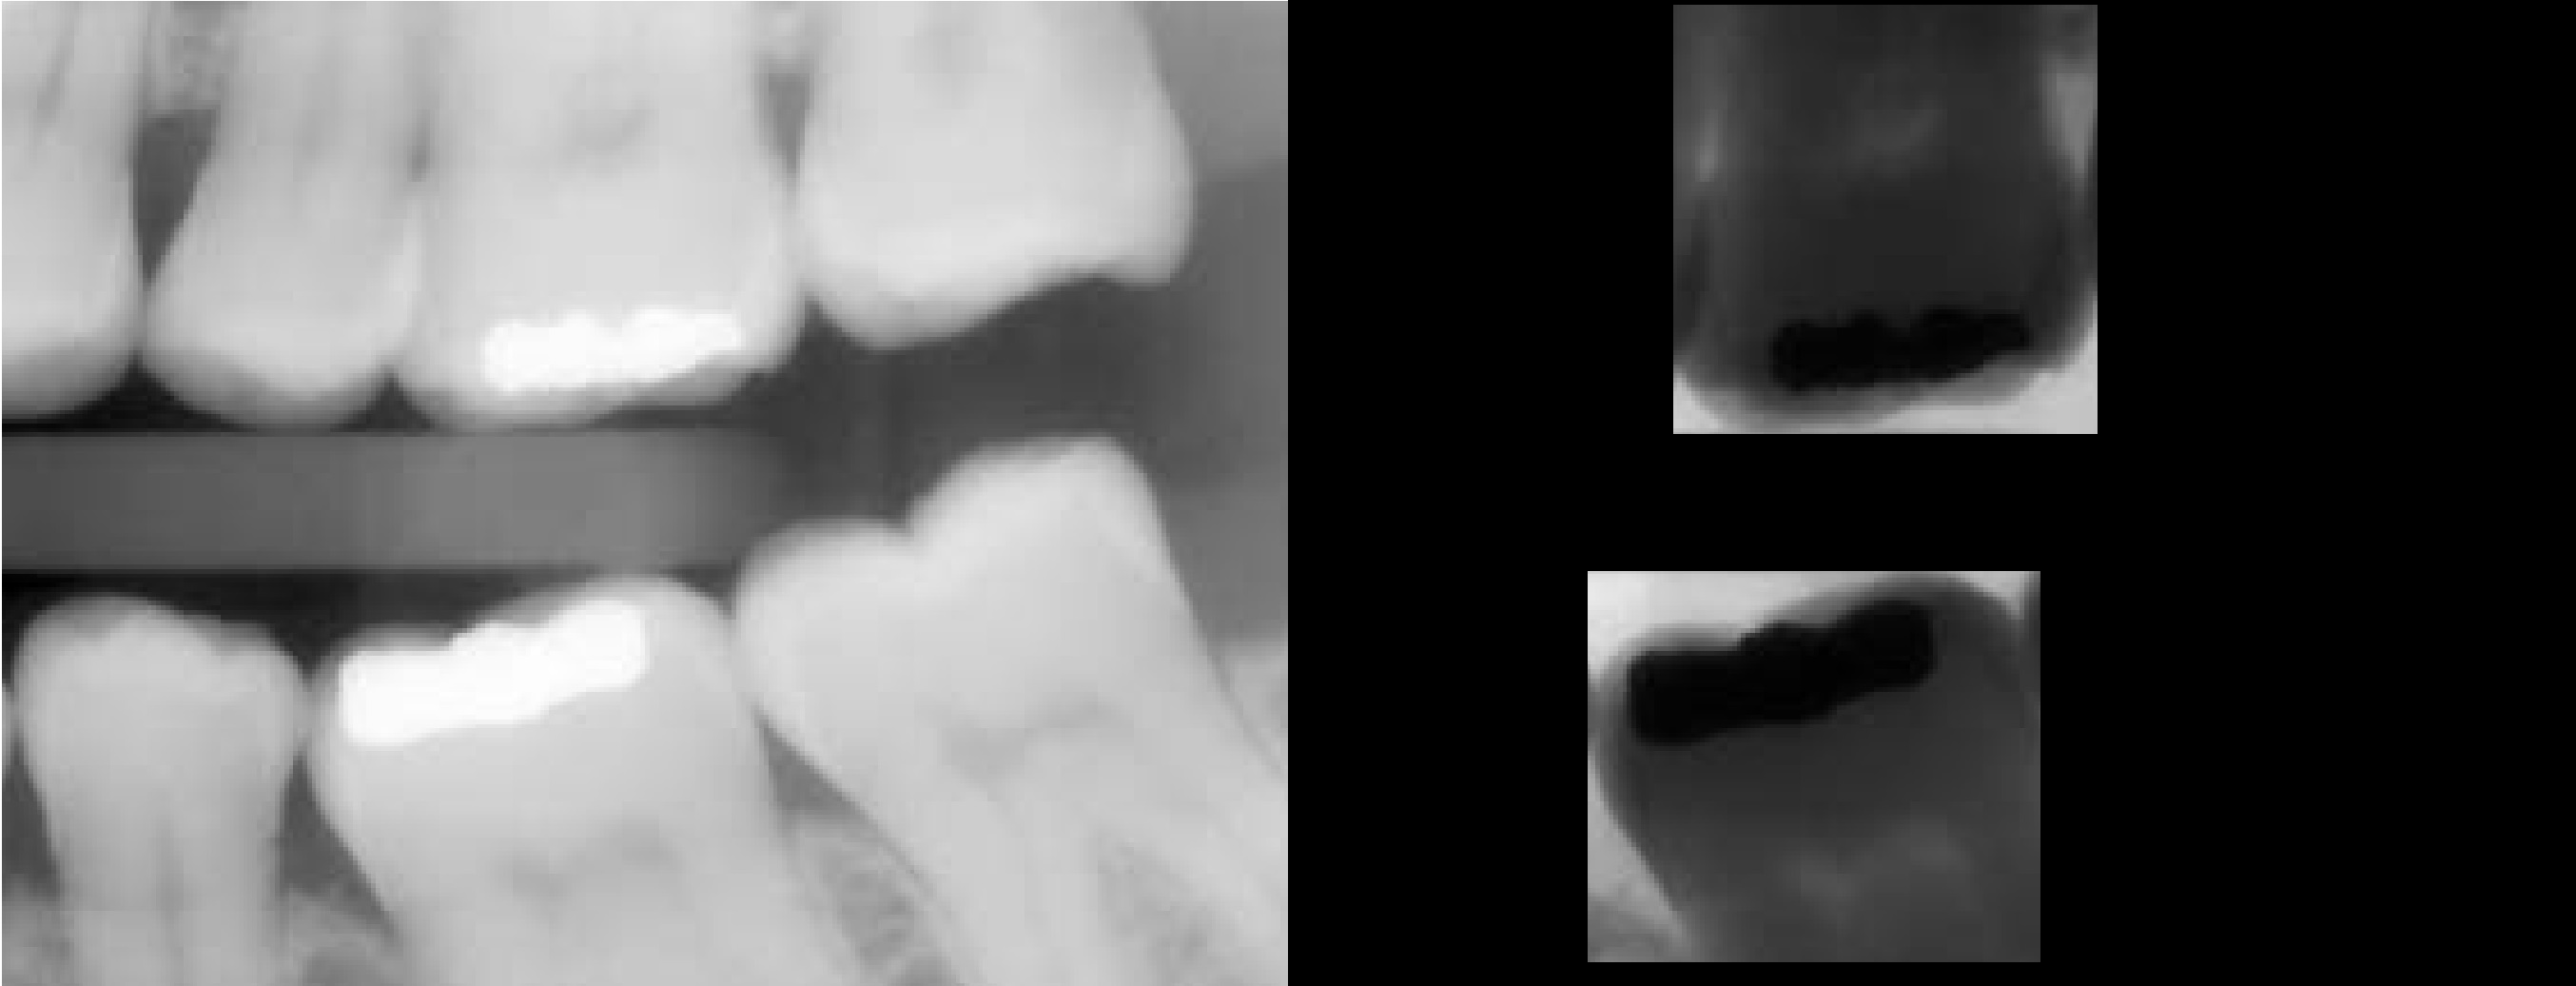

In [97]:
image3 = cv.imread('/content/drive/MyDrive/Images/teeth.jpg')

mask_nand = np.zeros(image3.shape[:2], dtype="uint8")

cv.rectangle(mask_nand, (405, 5), (850, 455), 255, -1)
cv.rectangle(mask_nand, (315, 600), (790, 1010), 255, -1)

masked_and = cv.bitwise_and(image3, image3, mask=mask)
masked_not = cv.bitwise_not(masked_and, masked_and, mask=mask_nand)

final_frame = cv.hconcat((image3, masked_not))
cv2_imshow(final_frame)

# XOR

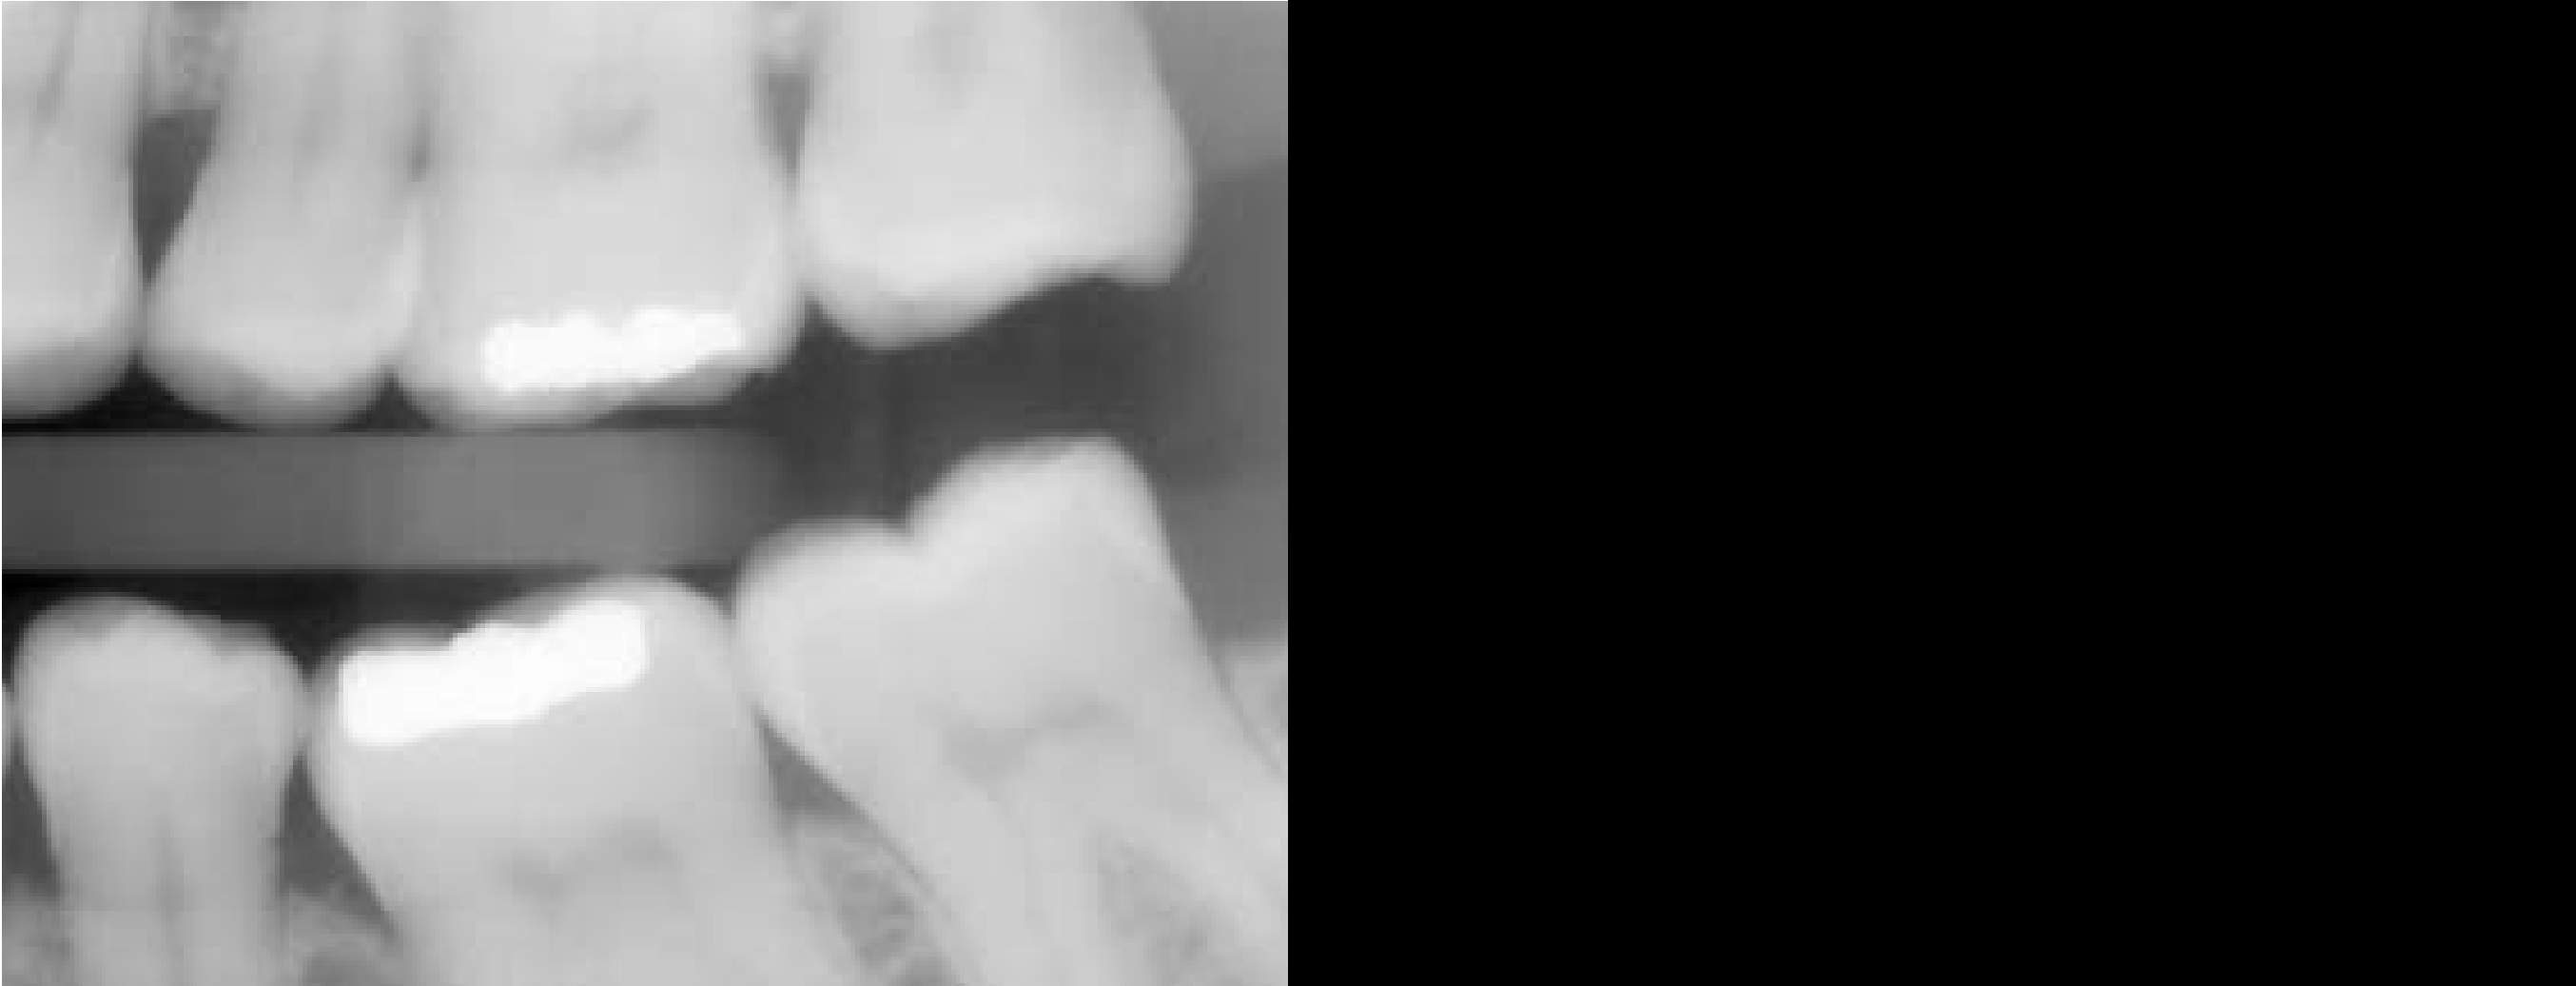

In [98]:
image4 = cv.imread('/content/drive/MyDrive/Images/teeth.jpg')

mask_xor = np.zeros(image4.shape[:2], dtype="uint8")

cv.rectangle(mask_xor, (405, 5), (850, 455), 255, -1)
cv.rectangle(mask_xor, (315, 600), (790, 1010), 255, -1)

masked = cv.bitwise_xor(image4, image4, mask=mask_xor)

final_frame = cv.hconcat((image4, masked))
cv2_imshow(final_frame)